## DATA SETUP

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# load local version of gallifrey, before pip installed version, for debugging
import pathlib
import sys
import os

sys.path.append(str(pathlib.Path(os.getcwd()).parent.joinpath("src")))

In [3]:
import yt
import numpy as np
import matplotlib.pyplot as plt

from gallifrey.setup import data_setup
from gallifrey.utilities.math import calculate_pca
from gallifrey.particles import rotated_dataset

TODO: planets.py


In [4]:
snapshot = 127
resolution = 4096
sim_id = "09_18"
ngpps_id: str = "ng75"
planet_categories = [
    "Earth",
    "Super-Earth",
    "Neptunian",
    "Sub-Giant",
    "Giant",
    "D-Burner",
]
save = False

In [5]:
ds, mw, stellar_model, imf, planet_model = data_setup(
    snapshot=snapshot, resolution=resolution, sim_id=sim_id, ngpps_id=ngpps_id
)


      DETECTED LOCAL MACHINE: Test snapshot loaded.

yt : [INFO     ] 2023-07-04 17:36:08,608 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-07-04 17:36:08,662 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-07-04 17:36:08,663 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-07-04 17:36:08,664 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-07-04 17:36:08,665 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-07-04 17:36:08,665 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-07-04 17:36:08,666 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-07-04 17:36:08,666 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-07-04 17:36:08,666 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2023-07-04 17:36:08,667 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 202

## PLOT SETUP

In [6]:
from planet_maps import plot_maps
from planet_1dprofiles import plot_1dprofiles
from planet_2dprofiles import plot_2dprofiles

## CREATE DATA SOURCE

In [7]:
radius = 60
normal_vector = calculate_pca(
    mw.sphere(radius=(10, "kpc"))["stars", "Coordinates"]
).components_[-1]

In [8]:
sphere_data = mw.sphere(radius=ds.quan(radius, "kpc"))

rotated_disk_data = rotated_dataset(
    mw.disk(
        radius=ds.quan(radius, "kpc"), height=ds.quan(0.5, "kpc"), normal=normal_vector
    ),
    mw.centre(),
    normal_vector,
    [
        ("stars", "[Fe/H]"),
        ("stars", "number"),
        *[("stars", f"{category}") for category in planet_categories],
    ],
)

rotated_sphere_data = rotated_dataset(
    sphere_data,
    mw.centre(),
    normal_vector,
    [
        ("stars", "[Fe/H]"),
        ("stars", "number"),
        *[("stars", f"{category}") for category in planet_categories],
    ],
)

yt : [INFO     ] 2023-07-04 17:36:21,018 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-07-04 17:36:21,019 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-07-04 17:36:21,020 Parameters: domain_left_edge          = [-53.69806519 -53.69806519 -53.69806519]
yt : [INFO     ] 2023-07-04 17:36:21,021 Parameters: domain_right_edge         = [51.66095168 51.66095168 51.66095168]
yt : [INFO     ] 2023-07-04 17:36:21,021 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-07-04 17:36:21,023 Allocating for 1.304e+05 particles
yt : [INFO     ] 2023-07-04 17:36:29,722 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-07-04 17:36:29,723 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-07-04 17:36:29,723 Parameters: domain_left_edge          = [-58.64838778 -58.64838778 -58.64838778]
yt : [INFO     ] 2023-07-04 17:36:29,724 Parameters: domain_right_edge         = [58.67914424 58.67914424 58.67914424]
yt : [INFO 

## FACE-ON MAPS

yt : [INFO     ] 2023-07-04 17:36:29,986 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-07-04 17:36:29,987 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-07-04 17:36:29,990 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-07-04 17:36:29,990 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-07-04 17:36:29,993 Splatting (('stars', 'Sub-Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:36:30,357 Splatting (('stars', 'D-Burner')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:36:30,546 Splatting (('stars', 'Neptunian')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:36:30,845 Splatting (('stars', 'Earth')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:36:31,045 Splatting (('stars', 'Super-Earth')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:36:31,242 Splatting (('stars', 'Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-0

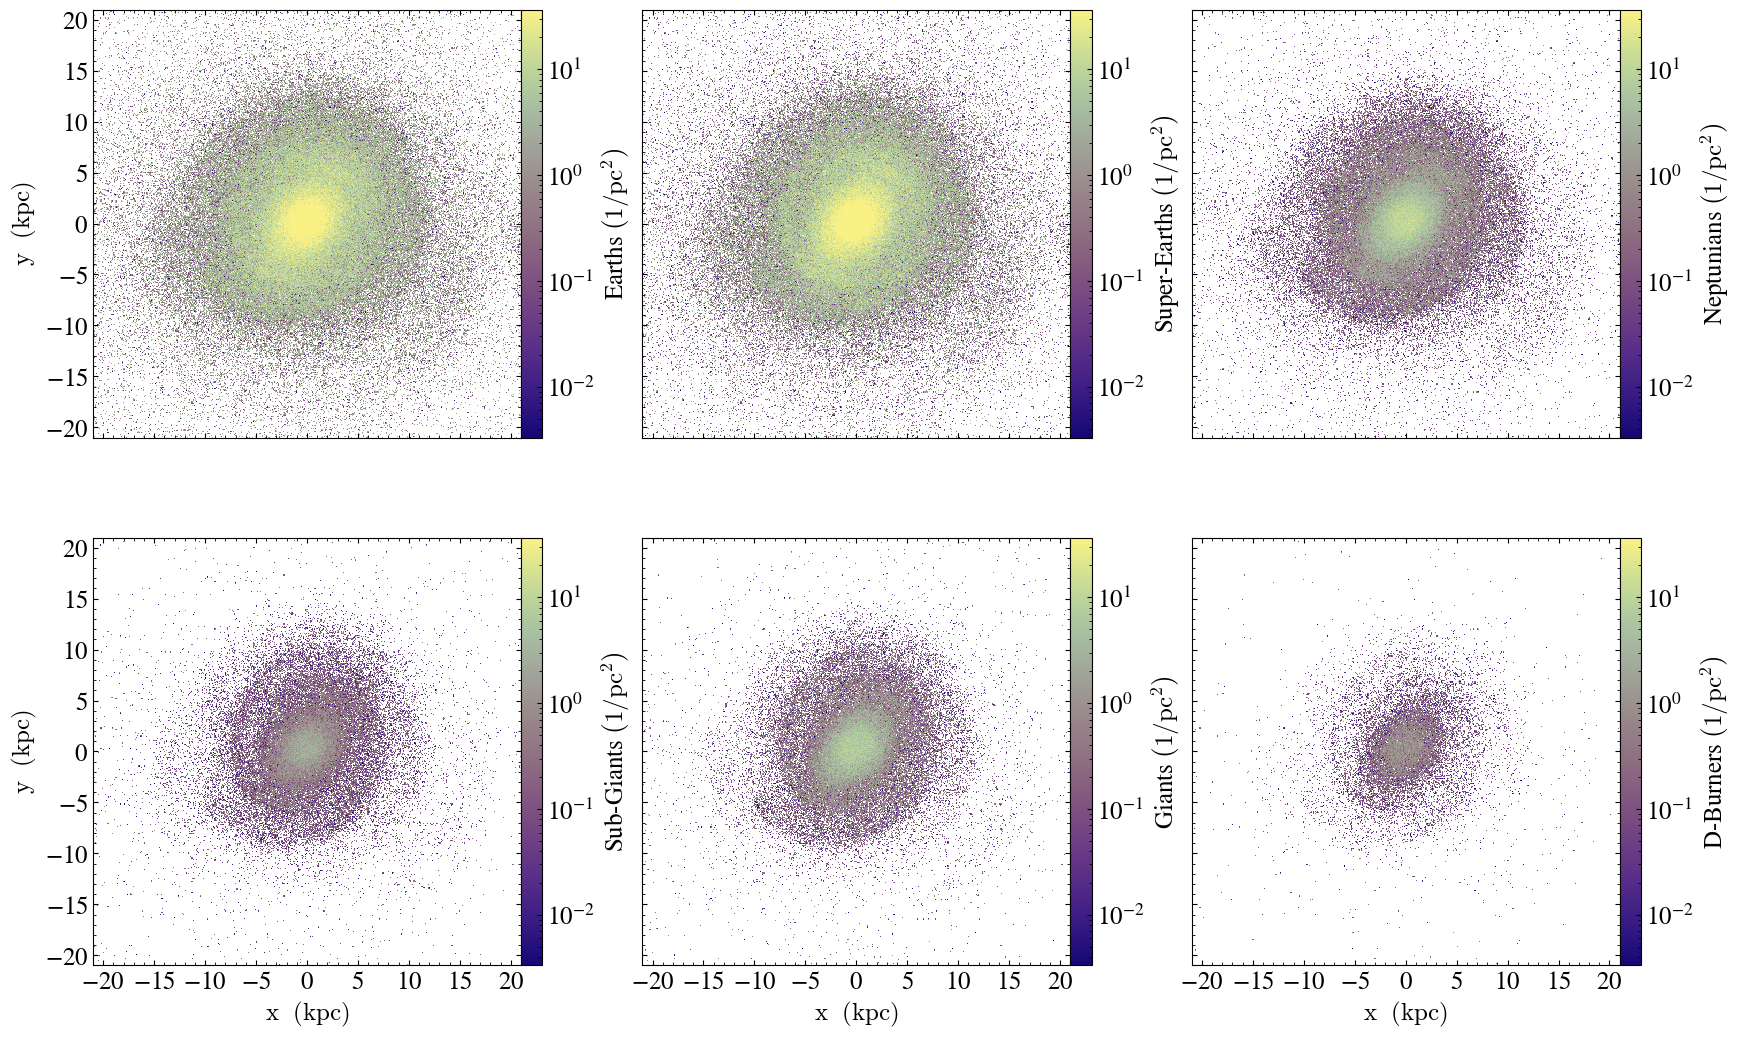

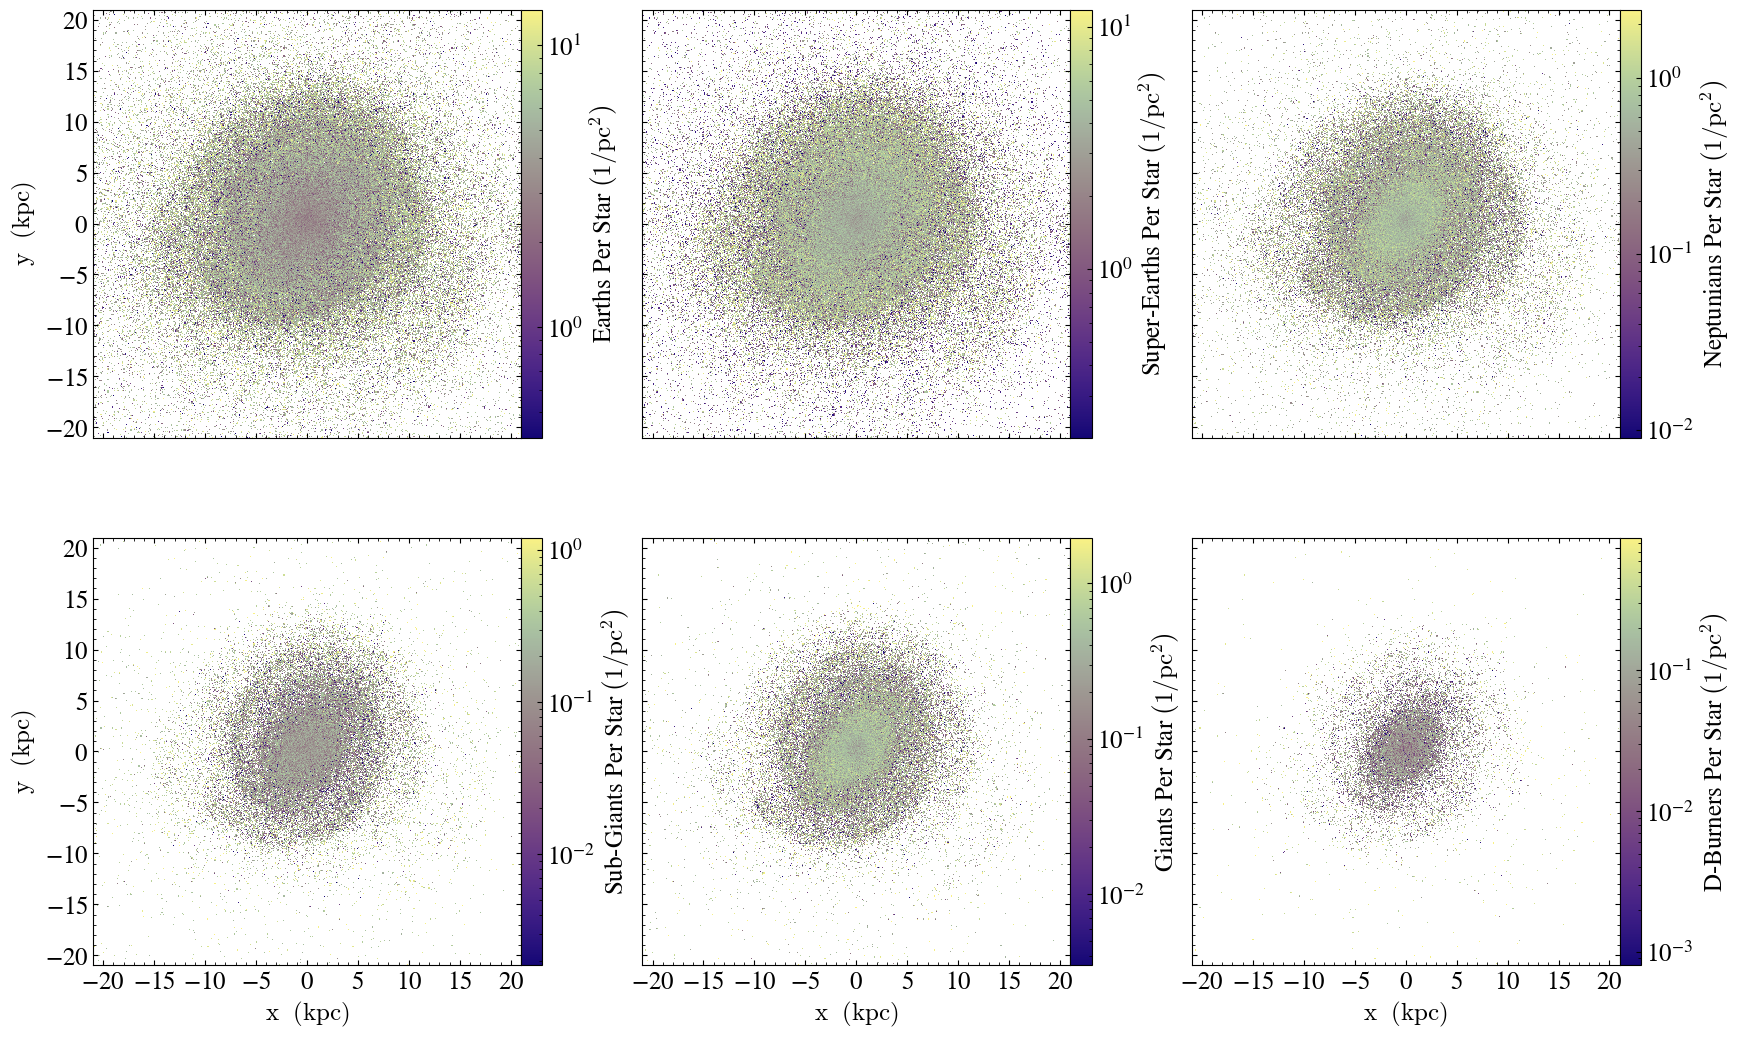

In [9]:
zplot, zfig = plot_maps(planet_categories, rotated_sphere_data, normal="z", save=save)
zplot_per_star, zfig_per_star = plot_maps(planet_categories, rotated_sphere_data, normal="z", weight_field=("stars", "number"), global_normalisation=False, save=save)

## SIDE-ON MAPS

yt : [INFO     ] 2023-07-04 17:36:40,240 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-07-04 17:36:40,241 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-07-04 17:36:40,243 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-07-04 17:36:40,243 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-07-04 17:36:40,245 Splatting (('stars', 'Sub-Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:36:40,669 Splatting (('stars', 'D-Burner')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:36:40,853 Splatting (('stars', 'Neptunian')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:36:41,048 Splatting (('stars', 'Earth')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:36:41,214 Splatting (('stars', 'Super-Earth')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:36:41,401 Splatting (('stars', 'Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-0

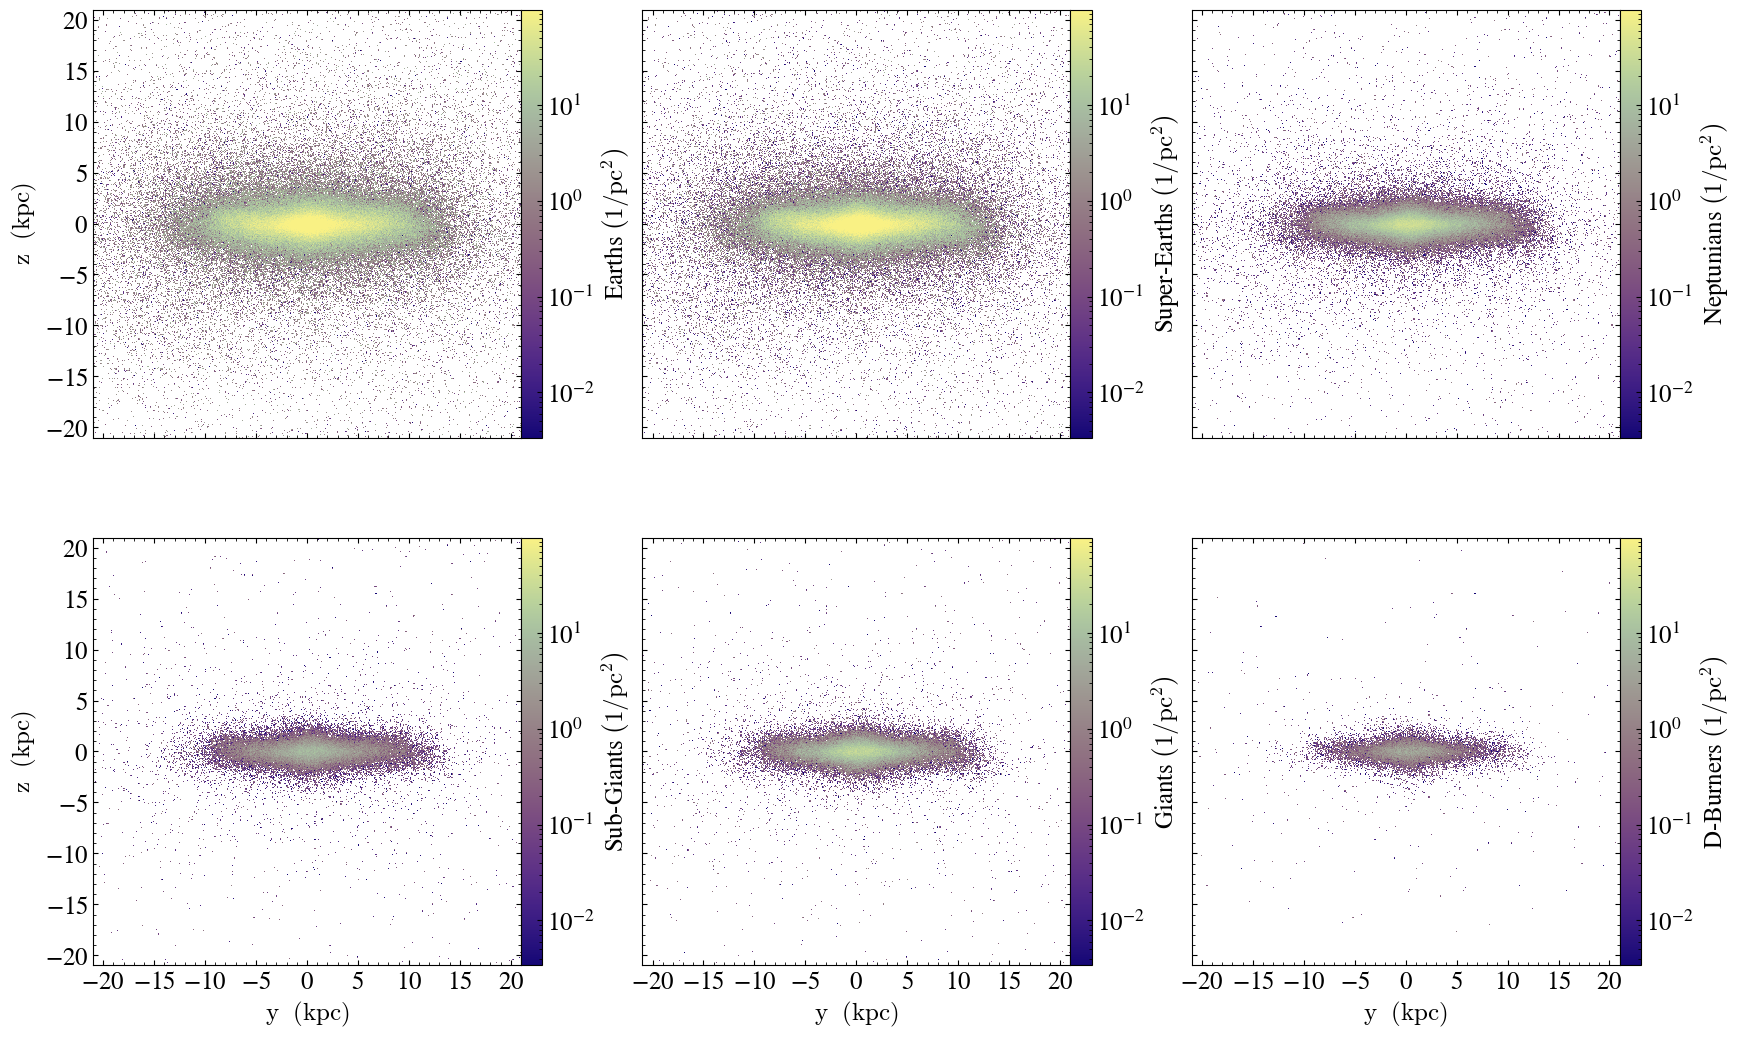

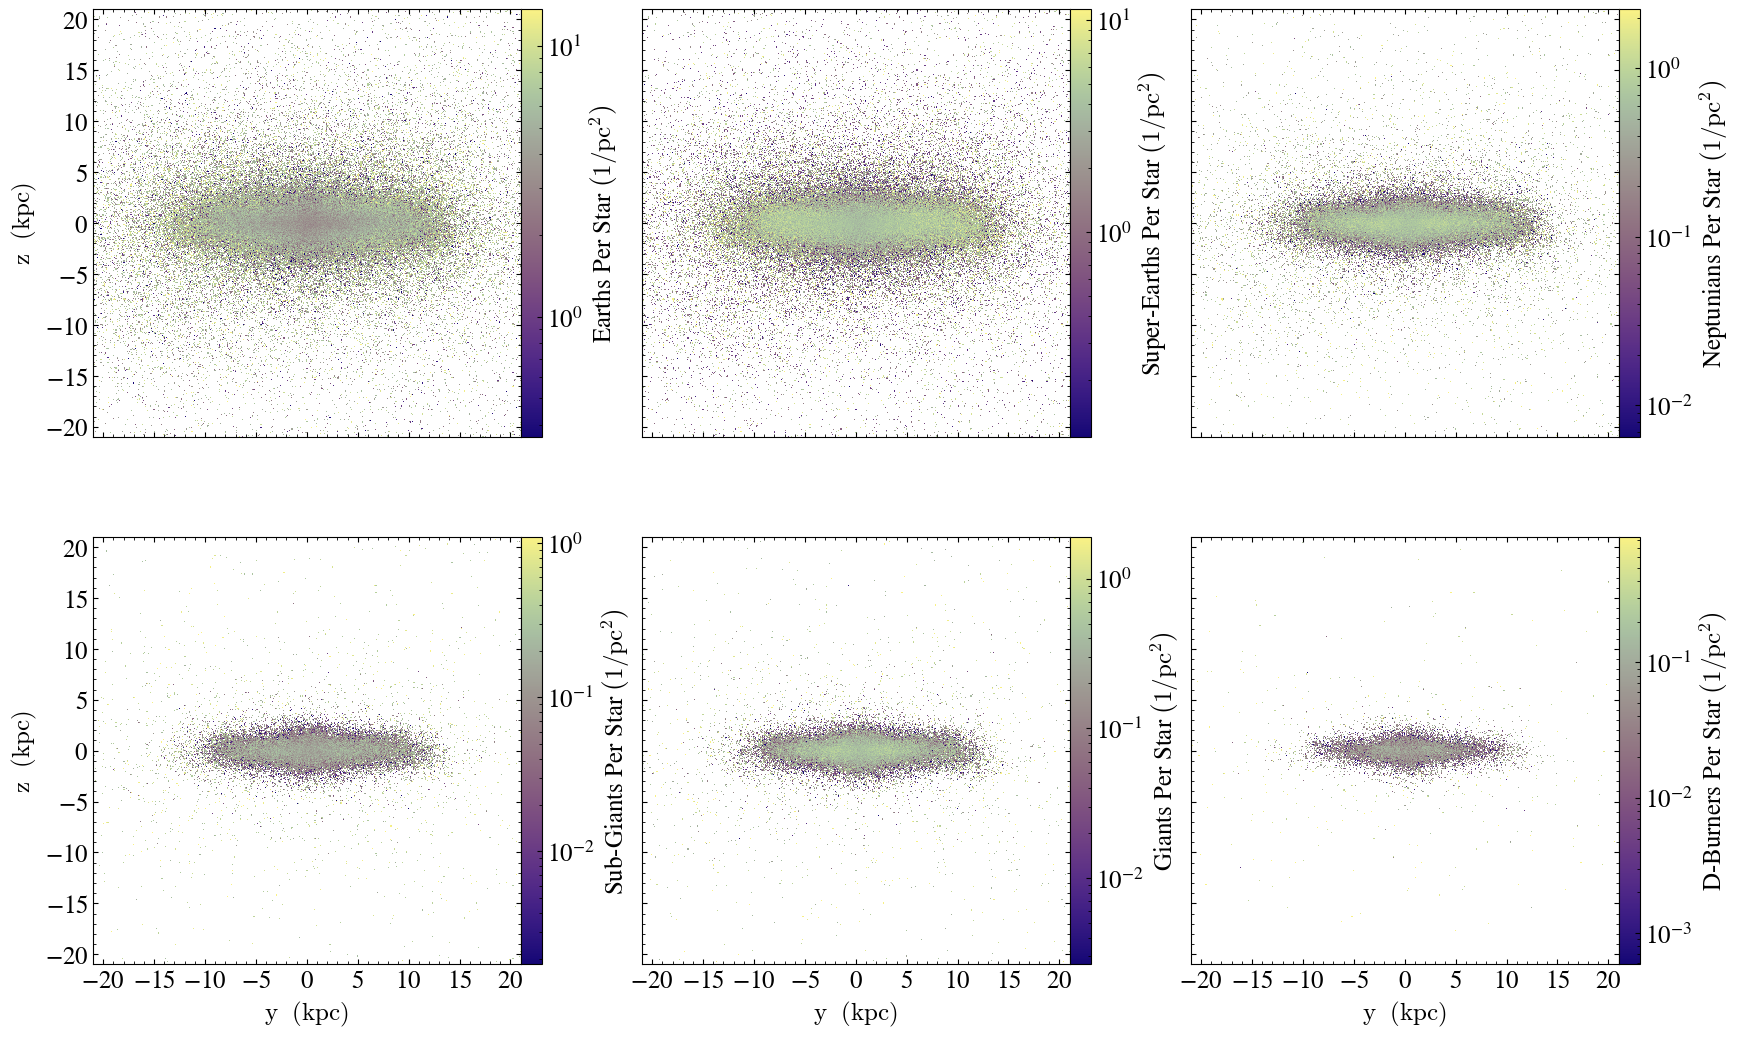

In [10]:
xplot, xfig = plot_maps(planet_categories, rotated_sphere_data, normal="x", save=save)
xplot_per_star, xfig_per_star = plot_maps(planet_categories, rotated_sphere_data, normal="x", weight_field=("stars", "number"), global_normalisation=False, save=save)

## 1D Profiles

## 2D Profiles